# Explore here

In [1]:
# Your code here
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

2025-04-03 16:51:55.181794: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 16:51:55.183826: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 16:51:55.188811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-03 16:51:55.204119: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743699115.224873    6995 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743699115.22

In [ ]:
# Directorios de datos
data_dir = "../data"
train_dir = os.path.join(data_dir, "train")
test_dir = os.path.join(data_dir, "test")
img_size = (200, 200)
batch_size = 32

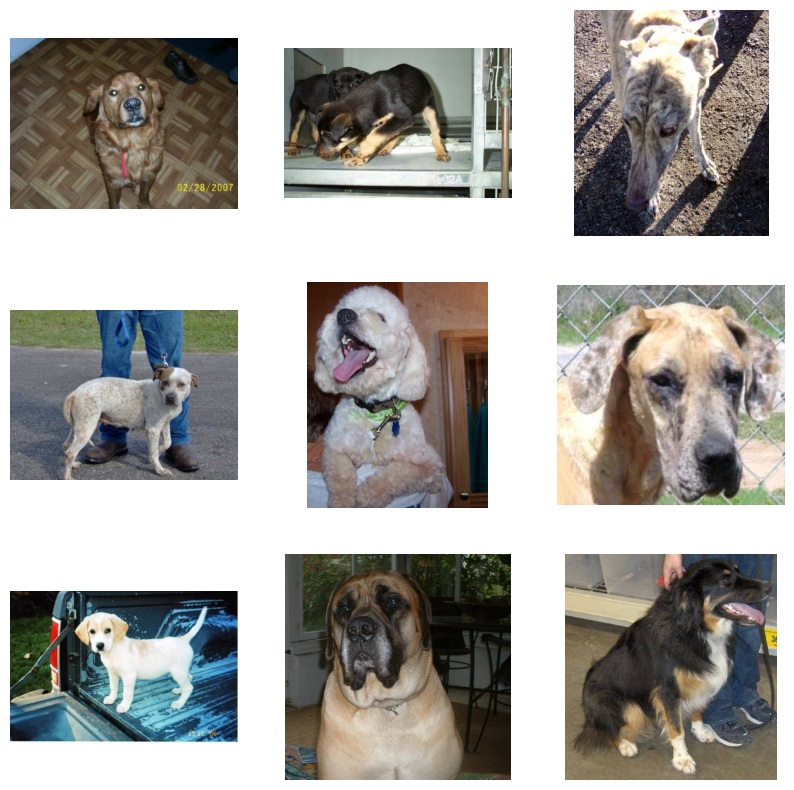

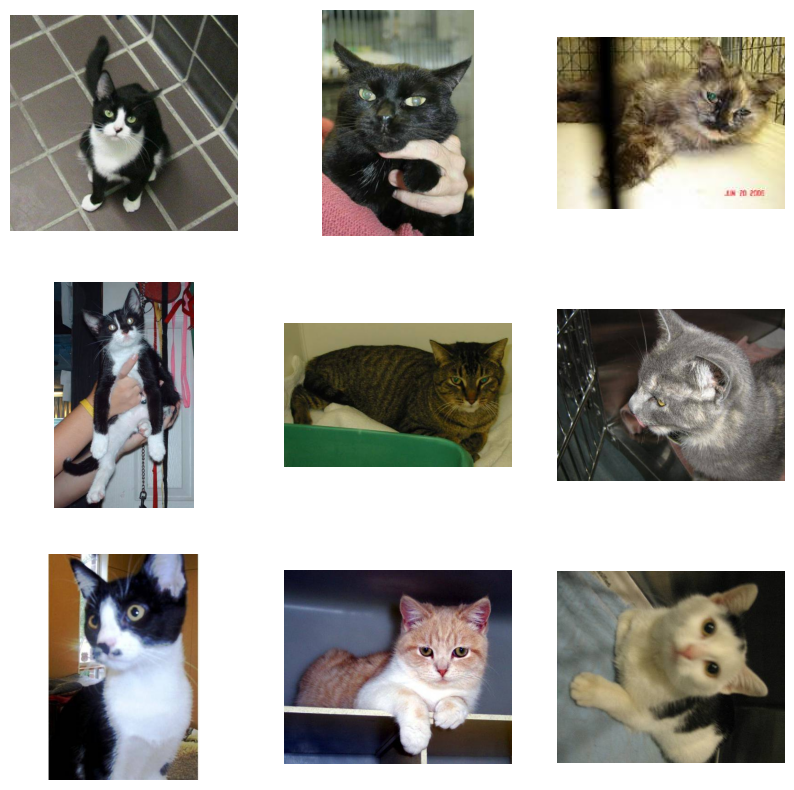

In [3]:
# Verificar imágenes de ejemplo
def plot_images(path, name):
    images = [os.path.join(path, img) for img in os.listdir(path) if name in img][:9]
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for img_path, ax in zip(images, axes.flat):
        img = plt.imread(img_path)
        ax.imshow(img)
        ax.axis("off")
    plt.show()

plot_images(train_dir, "dog")
plot_images(train_dir, "cat")

In [ ]:
import os
import shutil

# Definir rutas
train_dir = "./data/train"
test_dir = "./data/test"

# Crear carpetas si no existen
for category in ["cats", "dogs"]:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Función para mover imágenes a la carpeta correspondiente
def organize_images(base_dir):
    for filename in os.listdir(base_dir):
        if filename.startswith("cat"):
            shutil.move(os.path.join(base_dir, filename), os.path.join(base_dir, "cats", filename))
        elif filename.startswith("dog"):
            shutil.move(os.path.join(base_dir, filename), os.path.join(base_dir, "dogs", filename))

# Organizar imágenes
organize_images(train_dir)
organize_images(test_dir)

print("Imágenes organizadas correctamente.")


In [6]:
# Preprocesamiento de datos con ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

trdata = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)
tsdata = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
